In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import random
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
%matplotlib inline

In [23]:
# img_path = Path("../../data/Linnaeus_5_128x128/")
img_path = Path("../../data/CatFaces/")

In [24]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(img_path)

There are 0 directories and 15747 images in '..\..\data\CatFaces'.


Random image path: ..\..\data\CatFaces\1455.jpg
Image height: 64
Image width: 64


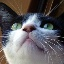

In [25]:
import random
from PIL import Image

# image_path_list = list(img_path.glob("*/*/*.jpg"))
image_path_list = list(img_path.glob("*.jpg"))

# choses randomly
random_image_path = random.choice(image_path_list)

# if we had folders as named directory like in linnaeus we would use this
# image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
# print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

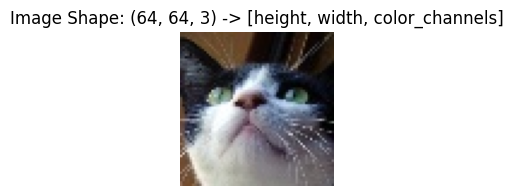

In [26]:
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(2, 2))
plt.imshow(img_as_array)
plt.title(f"Image Shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [27]:
class CatFaces(Dataset):
    
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(Path(targ_dir).glob("*.jpg")) 
        self.transform = transform
    
    def load_image(self, idx: int) -> Image.Image:
        image_path = self.paths[idx]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, idx: int) -> torch.Tensor:
        img = self.load_image(idx)
        
        if self.transform:
            return self.transform(img)
        else:
            return img

In [28]:
train = transforms.Compose([
    transforms.ToTensor()
])

In [29]:
catfaces = CatFaces("../../data/CatFaces/", train)

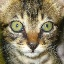

In [30]:
catfaces.load_image(2000)

In [31]:
from torch.utils.data import DataLoader

loader = DataLoader(dataset=catfaces, batch_size=128, shuffle=True)

In [33]:
for i, item in enumerate(loader):
    display(item.shape)
    display(i)
    break

torch.Size([128, 3, 64, 64])

0

torch.Size([128, 3, 64, 64])

1

torch.Size([128, 3, 64, 64])

2

torch.Size([128, 3, 64, 64])

3

torch.Size([128, 3, 64, 64])

4

torch.Size([128, 3, 64, 64])

5

torch.Size([128, 3, 64, 64])

6

torch.Size([128, 3, 64, 64])

7

torch.Size([128, 3, 64, 64])

8

torch.Size([128, 3, 64, 64])

9

torch.Size([128, 3, 64, 64])

10

torch.Size([128, 3, 64, 64])

11

torch.Size([128, 3, 64, 64])

12

torch.Size([128, 3, 64, 64])

13

torch.Size([128, 3, 64, 64])

14

torch.Size([128, 3, 64, 64])

15

torch.Size([128, 3, 64, 64])

16

torch.Size([128, 3, 64, 64])

17

torch.Size([128, 3, 64, 64])

18

torch.Size([128, 3, 64, 64])

19

torch.Size([128, 3, 64, 64])

20

torch.Size([128, 3, 64, 64])

21

torch.Size([128, 3, 64, 64])

22

torch.Size([128, 3, 64, 64])

23

torch.Size([128, 3, 64, 64])

24

torch.Size([128, 3, 64, 64])

25

torch.Size([128, 3, 64, 64])

26

torch.Size([128, 3, 64, 64])

27

torch.Size([128, 3, 64, 64])

28

torch.Size([128, 3, 64, 64])

29

torch.Size([128, 3, 64, 64])

30

torch.Size([128, 3, 64, 64])

31

torch.Size([128, 3, 64, 64])

32

torch.Size([128, 3, 64, 64])

33

torch.Size([128, 3, 64, 64])

34

torch.Size([128, 3, 64, 64])

35

torch.Size([128, 3, 64, 64])

36

torch.Size([128, 3, 64, 64])

37

torch.Size([128, 3, 64, 64])

38

torch.Size([128, 3, 64, 64])

39

torch.Size([128, 3, 64, 64])

40

torch.Size([128, 3, 64, 64])

41

torch.Size([128, 3, 64, 64])

42

torch.Size([128, 3, 64, 64])

43

torch.Size([128, 3, 64, 64])

44

torch.Size([128, 3, 64, 64])

45

torch.Size([128, 3, 64, 64])

46

torch.Size([128, 3, 64, 64])

47

torch.Size([128, 3, 64, 64])

48

torch.Size([128, 3, 64, 64])

49

torch.Size([128, 3, 64, 64])

50

torch.Size([128, 3, 64, 64])

51

torch.Size([128, 3, 64, 64])

52

torch.Size([128, 3, 64, 64])

53

torch.Size([128, 3, 64, 64])

54

torch.Size([128, 3, 64, 64])

55

torch.Size([128, 3, 64, 64])

56

torch.Size([128, 3, 64, 64])

57

torch.Size([128, 3, 64, 64])

58

torch.Size([128, 3, 64, 64])

59

torch.Size([128, 3, 64, 64])

60

torch.Size([128, 3, 64, 64])

61

torch.Size([128, 3, 64, 64])

62

torch.Size([128, 3, 64, 64])

63

torch.Size([128, 3, 64, 64])

64

torch.Size([128, 3, 64, 64])

65

torch.Size([128, 3, 64, 64])

66

torch.Size([128, 3, 64, 64])

67

torch.Size([128, 3, 64, 64])

68

torch.Size([128, 3, 64, 64])

69

torch.Size([128, 3, 64, 64])

70

torch.Size([128, 3, 64, 64])

71

torch.Size([128, 3, 64, 64])

72

torch.Size([128, 3, 64, 64])

73

torch.Size([128, 3, 64, 64])

74

torch.Size([128, 3, 64, 64])

75

torch.Size([128, 3, 64, 64])

76

torch.Size([128, 3, 64, 64])

77

torch.Size([128, 3, 64, 64])

78

torch.Size([128, 3, 64, 64])

79

torch.Size([128, 3, 64, 64])

80

torch.Size([128, 3, 64, 64])

81

torch.Size([128, 3, 64, 64])

82

torch.Size([128, 3, 64, 64])

83

torch.Size([128, 3, 64, 64])

84

torch.Size([128, 3, 64, 64])

85

torch.Size([128, 3, 64, 64])

86

torch.Size([128, 3, 64, 64])

87

torch.Size([128, 3, 64, 64])

88

torch.Size([128, 3, 64, 64])

89

torch.Size([128, 3, 64, 64])

90

torch.Size([128, 3, 64, 64])

91

torch.Size([128, 3, 64, 64])

92

torch.Size([128, 3, 64, 64])

93

torch.Size([128, 3, 64, 64])

94

torch.Size([128, 3, 64, 64])

95

torch.Size([128, 3, 64, 64])

96

torch.Size([128, 3, 64, 64])

97

torch.Size([128, 3, 64, 64])

98

torch.Size([128, 3, 64, 64])

99

torch.Size([128, 3, 64, 64])

100

torch.Size([128, 3, 64, 64])

101

torch.Size([128, 3, 64, 64])

102

torch.Size([128, 3, 64, 64])

103

torch.Size([128, 3, 64, 64])

104

torch.Size([128, 3, 64, 64])

105

torch.Size([128, 3, 64, 64])

106

torch.Size([128, 3, 64, 64])

107

torch.Size([128, 3, 64, 64])

108

torch.Size([128, 3, 64, 64])

109

torch.Size([128, 3, 64, 64])

110

torch.Size([128, 3, 64, 64])

111

torch.Size([128, 3, 64, 64])

112

torch.Size([128, 3, 64, 64])

113

torch.Size([128, 3, 64, 64])

114

torch.Size([128, 3, 64, 64])

115

torch.Size([128, 3, 64, 64])

116

torch.Size([128, 3, 64, 64])

117

torch.Size([128, 3, 64, 64])

118

torch.Size([128, 3, 64, 64])

119

torch.Size([128, 3, 64, 64])

120

torch.Size([128, 3, 64, 64])

121

torch.Size([128, 3, 64, 64])

122

torch.Size([3, 3, 64, 64])

123

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
class Linnaeus(Dataset):
    
    def __init__(self, targ_dir: str, transform=None) -> None:
        self.paths = list(Path(targ_dir).glob("*/*/*.jpg")) 
        self.transform = transform
    
    def load_image(self, idx: int) -> Image.Image:
        image_path = self.paths[idx]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, idx: int) -> torch.Tensor:
        img = self.load_image(idx)
        
        if self.transform:
            return self.transform(img)
        else:
            return img

In [13]:
lin = Linnaeus("../../data/Linnaeus_5_128x128/")

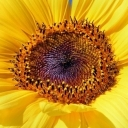

In [14]:
lin[1200]